In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from numba import njit

In [171]:
%config InlineBackend.figure_format = "retina"

In [172]:
n_rows = 7
n_cols = 10
gridworld = np.zeros((n_rows, n_cols))

In [173]:
init_pos = np.array([3, 0])
goal_pos = np.array([3, 7])

In [216]:
strength = -np.array([0, 0, 0, 1, 1, 1, 2, 2, 1, 0])
wind = np.c_[strength, np.zeros(n_cols)]
wind = np.zeros((n_rows, n_cols, 2)) + wind[None, ...]

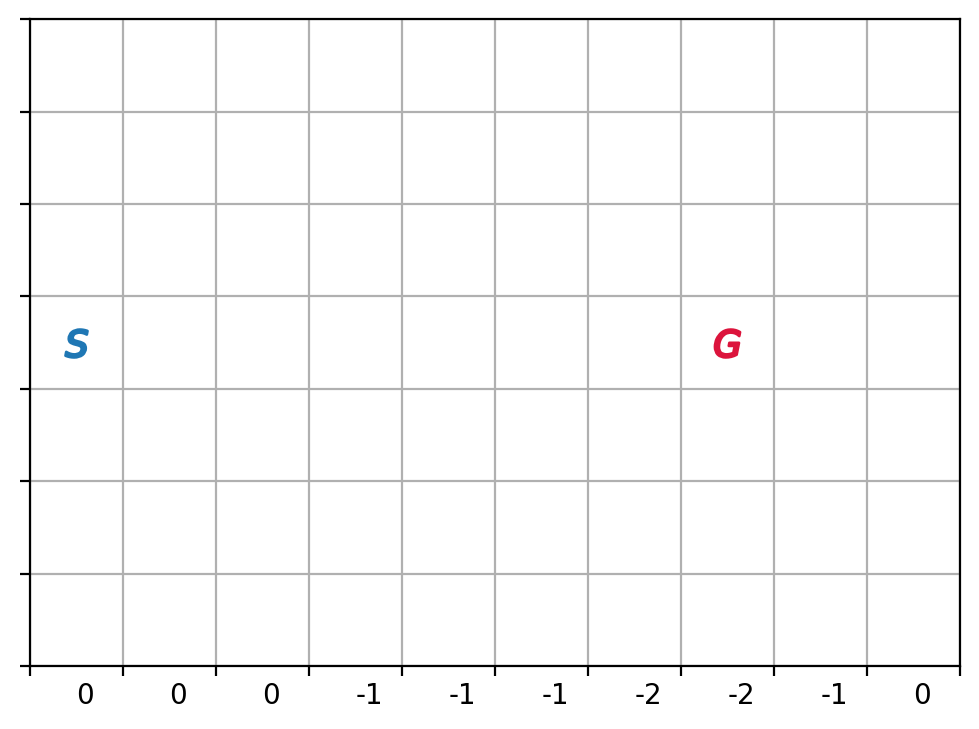

In [217]:
fig, ax = plt.subplots(figsize=(n_cols * 0.6, n_rows * 0.6))
xticks = np.arange(n_cols + 1)
yticks = np.arange(n_rows + 1)

init = init_pos[::-1] + 0.5
goal = goal_pos[::-1] + 0.5
ax.scatter(*init, marker="$S$", s=100)
ax.scatter(*goal, marker="$G$", s =100, c="crimson")
# plt.scatter(*finish_pos)

ax.set_xticks(xticks, labels="")
plt.yticks(yticks, labels="")

# TODO: change for minor xticks
for x, s in enumerate(strength):
    plt.text(x + 0.5, -0.4, s)

plt.grid()

In [218]:
movements = np.array([
    [0, 1], # right
    [0, -1], # left
    [1, 0], # up,
    [-1, 0], # down
])
n_actions = len(movements)

In [219]:
@njit
def get_probas(qval, epsilon):
    qmax = qval.max()
    n_actions = len(qval)

    # TODO:
    # add elif condition if more than action has the same value
    if np.all(qmax == qval):
        # return random action
        probas = np.ones(n_actions) / n_actions
    else:
        # return epsilon-greeedy action
        action_max = qval.argmax()
        probas = epsilon * np.ones(n_actions) / n_actions
        probas[action_max] = 1 - epsilon + epsilon / n_actions

    return probas

In [220]:
Q = np.zeros((n_rows, n_cols, n_actions)) # action-value function

In [221]:
epsilon = 0.1
pos = init_pos.copy()

In [222]:
q_state = Q[*pos]

In [223]:
probas = get_probas(q_state, epsilon)
probas

array([0.25, 0.25, 0.25, 0.25])

In [224]:
action = np.random.multinomial(1, probas).argmax()
action

2

In [233]:
def move(pos, step, wind):
    raw_pos = pos + step + wind[*pos]
    return raw_pos

In [234]:
pos = np.array([3, 4])
step = np.array([0, 1])
move(pos, step, wind)

array([2., 5.])

In [235]:
movements[action]

array([1, 0])

In [269]:
wind[*pos]

array([-1.,  0.])

## Another gridworld

In [289]:
n_rows = 7
n_cols = 10
ixs = np.arange(n_rows * n_cols).reshape(n_rows, n_cols)
ixs

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69]])

In [292]:
def get_pos(ix, n_cols):
    col = ix // n_cols
    row = ix % n_cols
    pos = np.array([col, row])
    return pos

In [293]:
get_pos(30, n_cols)

array([3, 0])

In [274]:
n_rows = 3
n_cols = 6
np.arange(n_rows * n_cols).reshape(n_rows, n_cols) // n_cols

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2]])

In [275]:
n_rows = 6
n_cols = 3
np.arange(n_rows * n_cols).reshape(n_rows, n_cols) // n_cols

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5]])